<a href="https://colab.research.google.com/github/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/3_Sentiment_Analysis_Amazon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/NLP_capstone_data')
os.listdir('.')

['Reviews.csv',
 'Amazon_reviews_processed.csv',
 'Amazon_reviews_cleaned_finalform.csv',
 'Amazon_reviews_after_sentiment.csv']

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('Amazon_reviews_cleaned_finalform.csv')
df.head(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,Good_reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,1,23,164,6.2,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,18,136,6.6,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,42,18,0,2,40,285,6.1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,15,5,0,4,18,128,6.2,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,12,5,0,0,13,83,5.5,1


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

###Creating 'Subjectivity' and 'Polarity' Scores

*   Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
*   Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [0]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

df['Text']= df['Text'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['Text'].apply(pol)
df['subjectivity'] = df['Text'].apply(sub)
df

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,1,23,164,6.2,1,0.425000,0.400000
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,18,136,6.6,0,0.216667,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,42,18,0,2,40,285,6.1,1,0.187000,0.548000
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,15,5,0,4,18,128,6.2,0,0.150000,0.650000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,12,5,0,0,13,83,5.5,1,0.458333,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392713,568450,B001EO7N10,A28KG5XORO54AY,0,0,5,2011-03-09,will not do without,great sesame chickenthis good better resturant...,10,8,0,1,14,96,5.9,1,0.675000,0.662500
392714,568451,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,2012-03-09,disappointed,disappointed flavor chocolate notes especially...,17,9,0,1,25,160,5.4,0,-0.250000,0.492857
392715,568452,B004I613EE,A121AA1GQV751Z,2,2,5,2012-02-21,perfect for our maltipoo,stars small give one training session tried tr...,24,11,0,1,38,241,5.5,1,-0.021875,0.418750
392716,568453,B004I613EE,A3IBEVCTXKNOH,1,1,5,2012-03-13,favorite training and reward treat,best treats training rewarding dog good groomi...,16,3,0,1,18,122,5.8,1,0.521429,0.678571


In [0]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word,Good_reviews,polarity,subjectivity
200588,254270,B004AO5926,A16EIA3UQG445T,3,3,5,2012-05-09,good coffee fits senseo machine,tasty strong fits senseo pods large basket mak...,13,12,1,1,23,140,5.4,1,0.13,0.63
313175,438070,B0000DBN2G,A11P335DE3Y7F6,1,6,3,2009-01-27,dissapointingly weak,although tea nice blend flavors terragon lemon...,29,6,1,1,32,199,5.4,0,0.09,0.54
258215,342808,B000ET4SM8,A1FIJXX5LUYR4Q,2,2,4,2012-06-21,great beans needs better packaging,arrived bags looked like vacuum sealed one poi...,24,5,0,3,32,210,5.6,1,0.25,0.61
160948,197187,B000LKXRV8,A1LZJZIHUPLDV4,5,5,5,2009-01-11,vegan organic kosher choice,vegan organic kosher parve fat free high prote...,48,96,4,0,117,710,5.7,1,0.26,0.56
176928,221741,B004CQWWKY,A2D1LPEUCTNT8X,0,0,4,2011-10-10,i like it artesian water source,dont best water tap work taste detect dont lik...,67,52,0,12,104,701,5.7,1,0.34,0.47


In [0]:
df2= pd.DataFrame()

In [0]:
for i in range (1,6):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.Score == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.Score == i].subjectivity.mean())

In [0]:
df2

,polarity,subjectivity
1,0.012646,0.509895
2,0.097721,0.515292
3,0.159662,0.521877
4,0.237175,0.541706
5,0.302381,0.561307


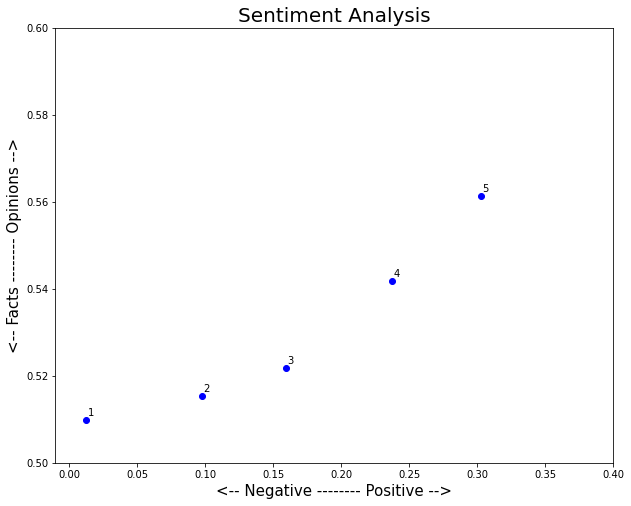

In [0]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df2.polarity.loc[index]
    y = df2.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, index, fontsize=10)
    plt.xlim(-.01, .4) 
    plt.ylim(.5, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Let's create this plot for Good_Reviews

In [0]:
df3= pd.DataFrame()
for i in range (0,2):
  df3.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
  df3.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
df3

,polarity,subjectivity
0,0.085000,0.515419
1,0.289962,0.557573


In [0]:
#At here, it looks I created a new column called reviews and gave values 'Good Reviews' and 'Bad Reviews'
#But then I deleted it.  It needs to be recreated.      

#Probably the code I use was this:

#df3['review']= df.index
#df3.rename(review={0:'Bad Reviews',1:'Good Reviews'}, inplace=True)


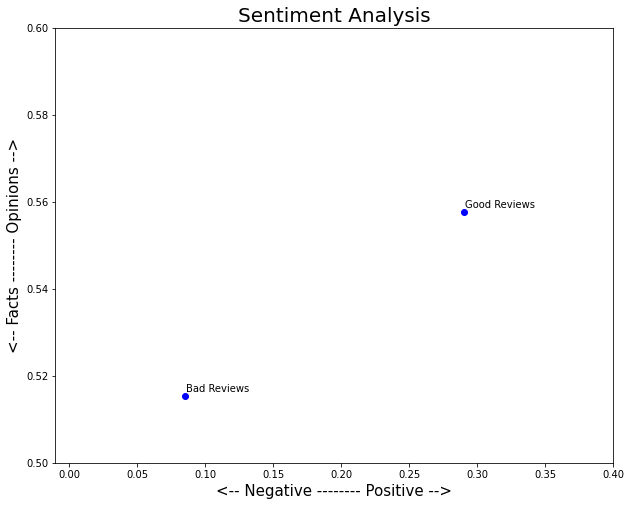

In [0]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, reviews in enumerate(df3.index):
    x = df3.polarity.loc[reviews]
    y = df3.subjectivity.loc[reviews]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df3['reviews'][index], fontsize=10)
    plt.xlim(-.01, .4) 
    plt.ylim(.5, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Distribution of the Good Reviews

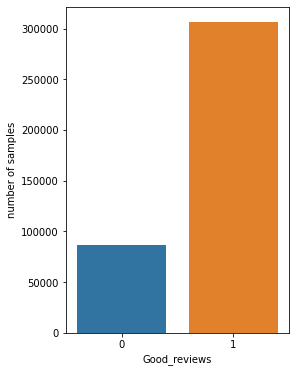

In [0]:
a = df.groupby(['Good_reviews'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'number of samples'})
fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x='Good_reviews', y='number of samples', data=a)

So, the classes are unbalanced. Good reviews are dominant over bad reviews. We need to keep this in my during the analysis.

In [0]:
print('Number of good reviews: {}'.format(a.loc[df['Good_reviews']==1]['number of samples'].values[0]))
print('Number of bad reviews: {}'.format(a.loc[df['Good_reviews']==0]['number of samples'].values[0]))

Number of good reviews: 86539
Number of bad reviews: 306179


# **Examining polarity** 



> Remember:Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.



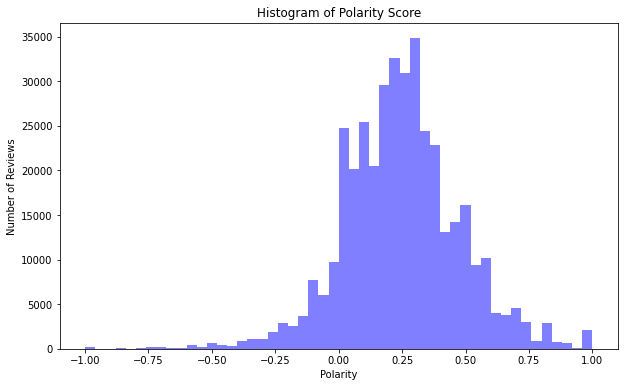

In [0]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

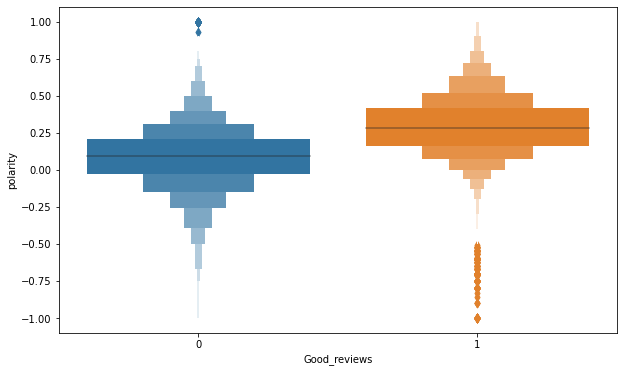

In [0]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='polarity', data=df)
plt.show();

As we can see from this box plot,
> we have some good reviews that has very low polarity (very negative)

> Some bad reviews that has high polarity (positive statement)


Let's check them

In [0]:
df.loc[(df.polarity == 1 & (df.Good_reviews == 0))].Text.head(10).tolist()

['product received advertisedbr strawberry bags pack',
 'expecting terms companys reputation excellent home delivery products',
 'bought allot different flavors happens one favorites getting soon',
 'deal healthiest salt use box last family year problem iodized sea salt raise blood pressure regular salt',
 'trouble finding locally delivery fast hunting flour aisle local grocery stores',
 'makes tasty super easy meal fast high caloriesbr instructions say saute veggies first recommend cooking chicken first chicken takes longer cook raw chicken ontop veggies makes slimy mess made snow peas carrots dont like little corn added red pepper flakes heat served ontop rice came wonderful dinner table less',
 'took one two get used pickle taste aim hooked keep bottle hand',
 'found crisps local walmart figured would give try yummy may never go back regular chips big chip fan anyway problem eat entire bag one sitting give crisps big thumbs',
 'use product daily provides steady stream energy get jit

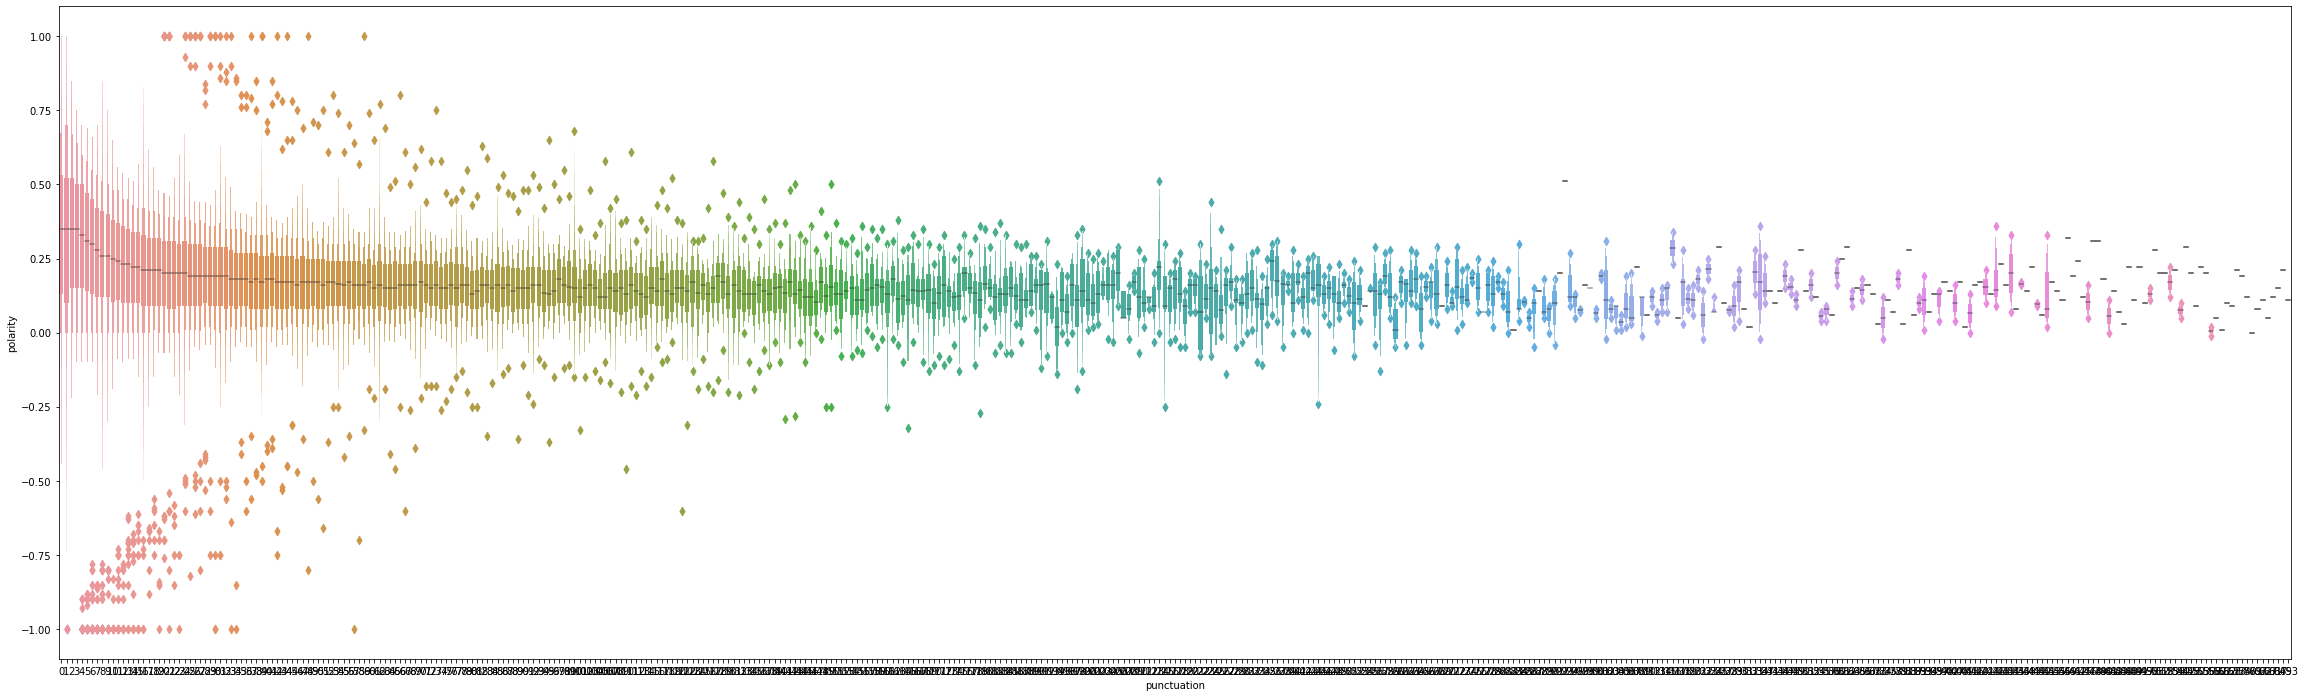

In [0]:
plt.figure(figsize=(40,12))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show();

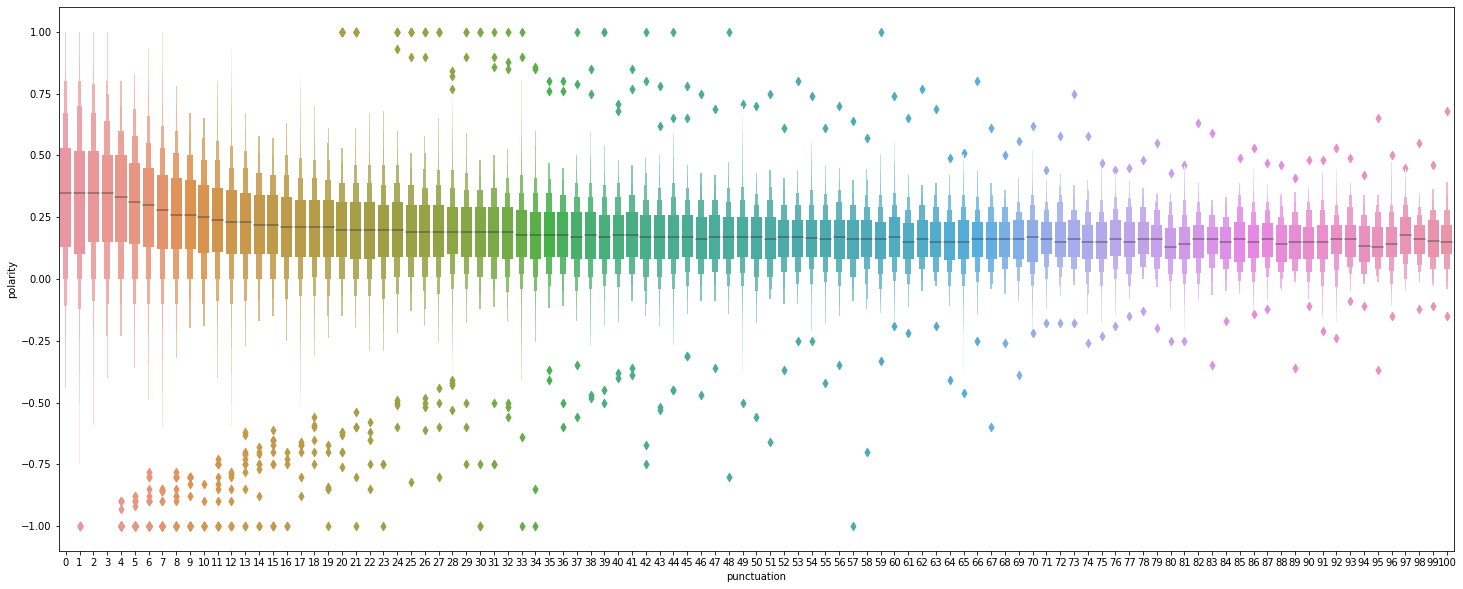

In [0]:
plt.figure(figsize=(25,10))
df2= df.loc[df.punctuation <= 100]
sns.boxenplot(x='punctuation', y='polarity', data=df2)
plt.show();

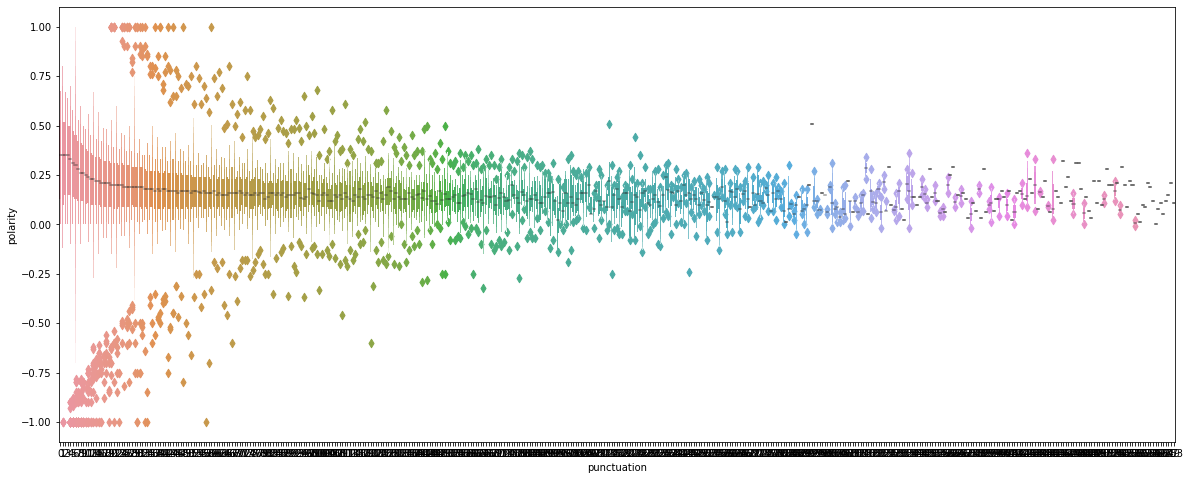

In [0]:
plt.figure(figsize=(20,8))
sns.boxenplot(x='punctuation', y='polarity', data=df)
plt.show();

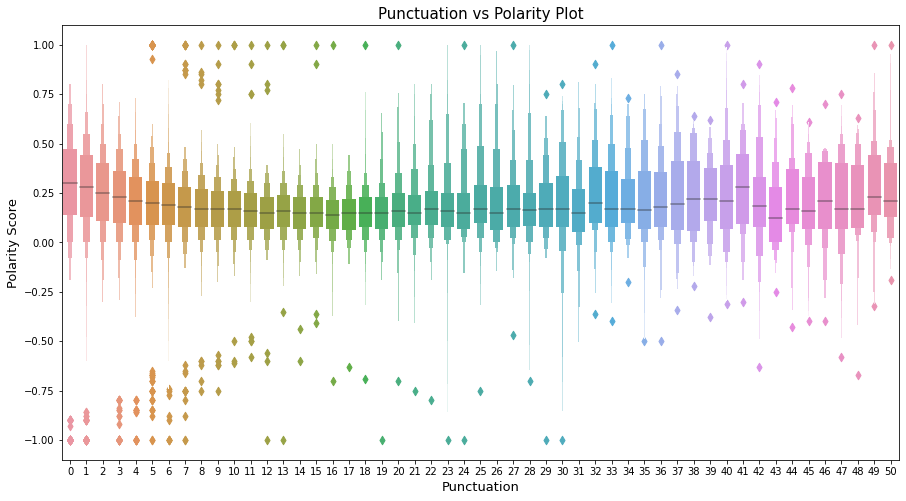

In [0]:
# sns.set(font_scale=1) #default setting

plt.figure(figsize=(15,8))
df3= df.loc[df.upper <= 50]
sns.boxenplot(x='upper', y='polarity', data=df3)
plt.xlabel('Punctuation', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Punctuation vs Polarity Plot', fontsize=15)
plt.show();

Polarity vs Helpfullness Numerator

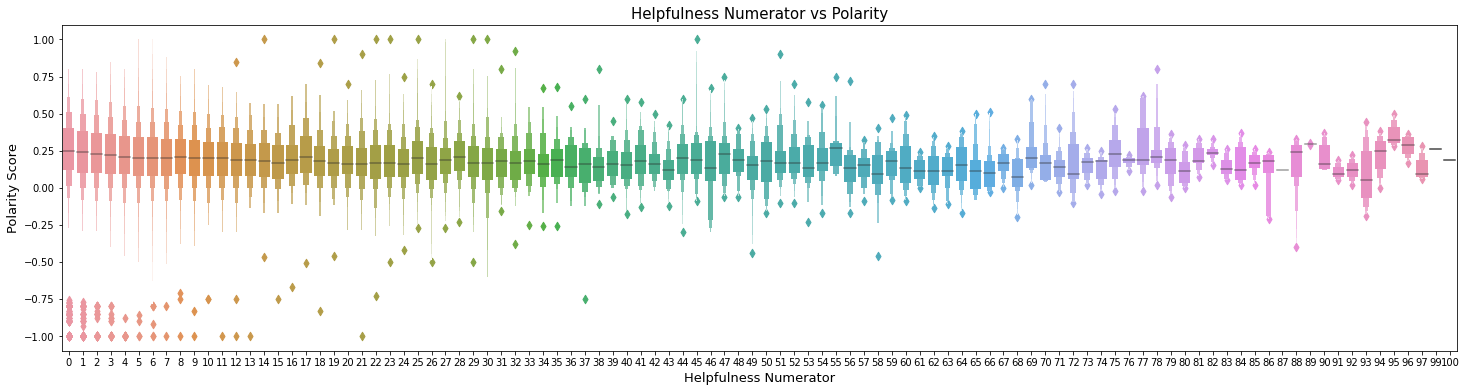

In [0]:
plt.figure(figsize=(25,6))
df_sub= df.loc[df.HelpfulnessNumerator <=100]
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', data=df_sub)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show();

We have more extreme values at low helpfullness score

#####Let's add a hue

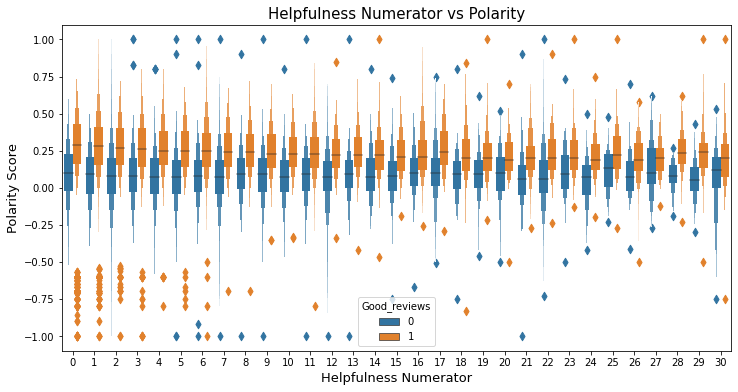

In [0]:
plt.figure(figsize=(12,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='HelpfulnessNumerator', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Helpfulness Numerator', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Helpfulness Numerator vs Polarity', fontsize=15)
plt.show();

It's interesting to see that there are reviews that are good review but highly negative at the same time.

Let's check them

In [0]:
df.loc[((df.polarity == -1) & (df.Good_reviews == 1) & (df.HelpfulnessNumerator >= 3))].Text.head(10).tolist()

['brotherinlaw got hooked bariani olive oil terrificbr use almost every day like storebought brands almost gooey awful tastingbr recommend everyone well everyone wouldnt',
 'forget highpriced energy tsps anything give energy youve ever imaginedbr shocking',
 'coffee greatthe price awful get thing bed bath beyond use one coupons',
 'sf syrups taste awful one taste like expect bravo',
 'diabetic mints greatthey taste like ones sugar nasty aftertaste']

It looks like sarcastic reviews are causing such a scoring problem for polarity. 

## **Polarity vs Number of Words** 

In [0]:
df2= df
df2['word_count']= df2['word_count'] //50*50


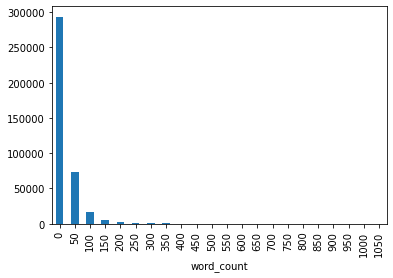

In [0]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [0]:
df_sub= df.loc[df.word_count //10*10]

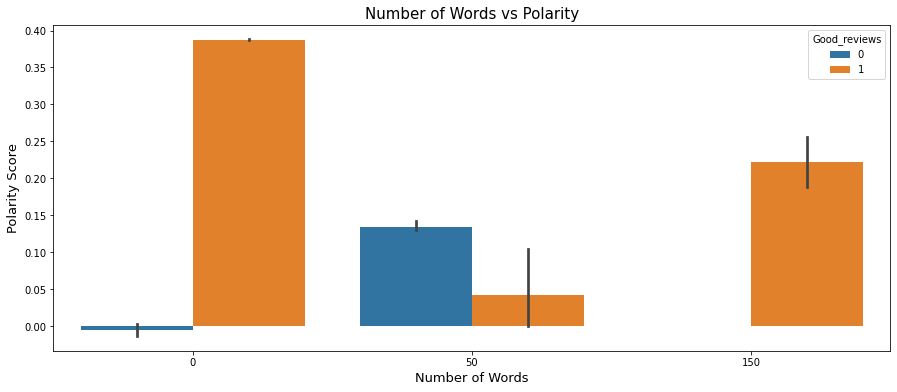

In [0]:
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

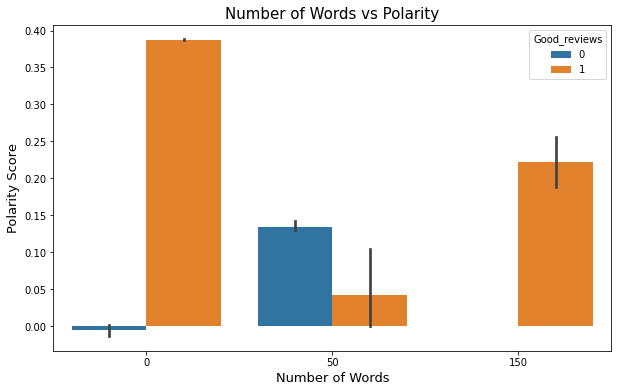

In [0]:
df_sub2= df.loc[df.word_count //50 * 50]
plt.figure(figsize=(10,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df_sub2)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

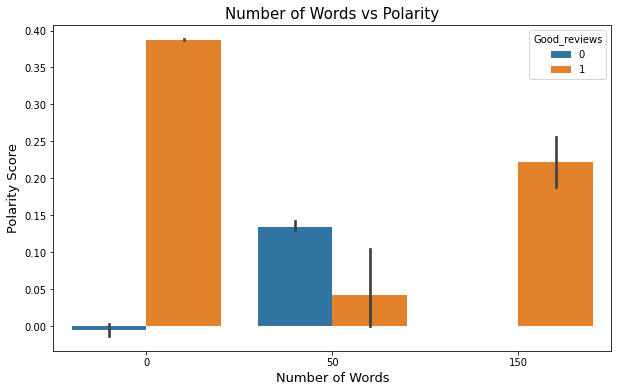

In [0]:
plt.figure(figsize=(10,6))
sns.barplot(x='word_count', y='polarity', hue='Good_reviews', data=df.loc[df.word_count //10 * 10])
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

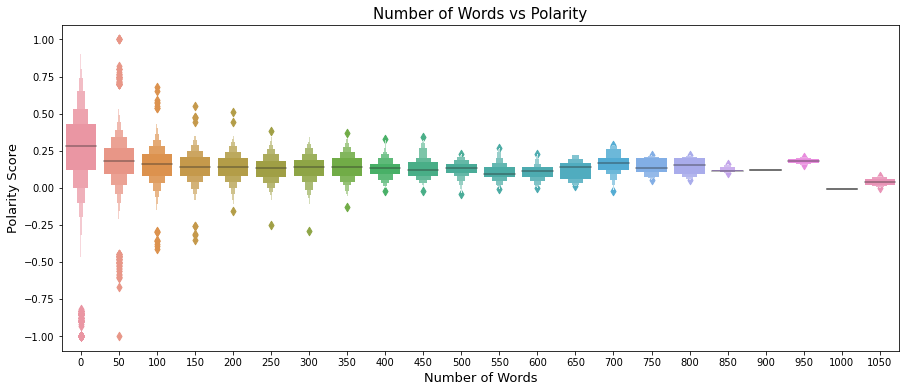

In [0]:
plt.figure(figsize=(15,6))
sns.boxenplot(x='word_count', y='polarity', data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

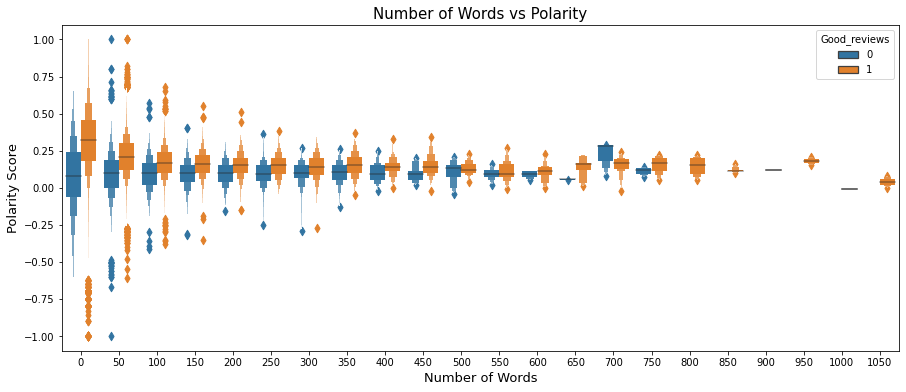

In [0]:
plt.figure(figsize=(15,6))
#df_sub2= df_sub.loc[df.word_count //50 * 50]

sns.boxenplot(x='word_count', y='polarity', hue='Good_reviews',  linewidth=2.5, data=df)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

It looks like, good reviwes has more number of words overall.

In [0]:
'''
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.catplot(x="word_count", hue="Good_reviews", col="polarity",col_wrap=1,
                 data=df_sub, kind="count",
               height=4, aspect= 2.3);

'''

'\ndf_sub= df.loc[df.HelpfulnessNumerator <=30]\nsns.catplot(x="word_count", hue="Good_reviews", col="polarity",col_wrap=1,\n                 data=df_sub, kind="count",\n               height=4, aspect= 2.3);\n\n'

# **Examining Subjectivity** 

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

Text(0.5, 1.0, 'Distribution of Subjectivity Score')

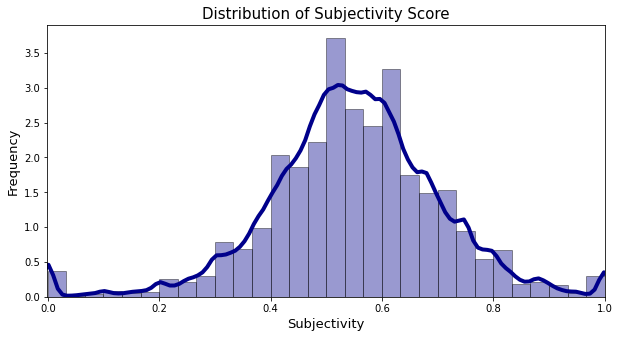

In [0]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)

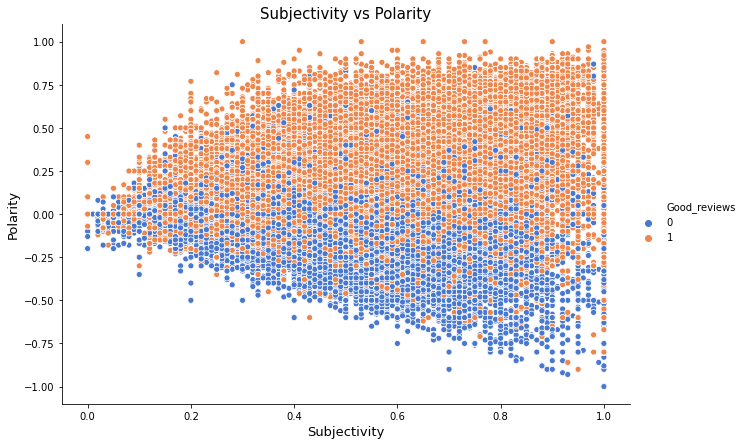

In [0]:
#plt.figure(figsize=(10,6))
sns.relplot(x="subjectivity", y="polarity", hue="Good_reviews", alpha=1 , palette="muted",
            height=6, aspect= 1.5, data=df)
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Polarity', fontsize=13)
plt.title('Subjectivity vs Polarity', fontsize=15)
plt.show();

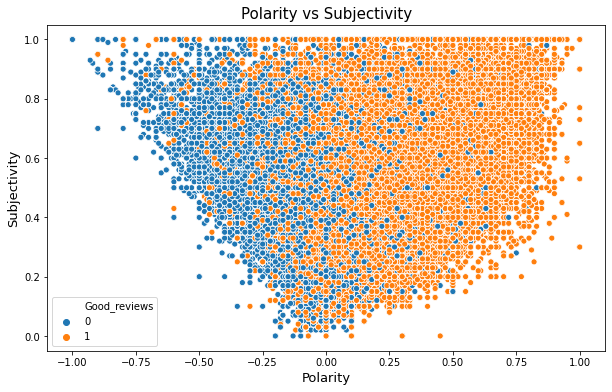

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity', y='subjectivity', hue="Good_reviews", data=df)
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Subjectivity', fontsize=13)
plt.title('Polarity vs Subjectivity', fontsize=15)
plt.show();

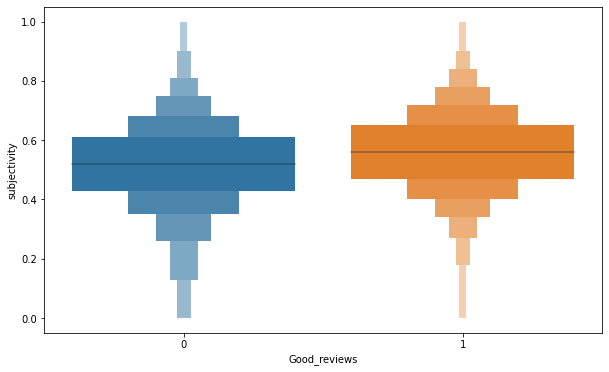

In [0]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Good_reviews', y='subjectivity', data=df)
plt.show();

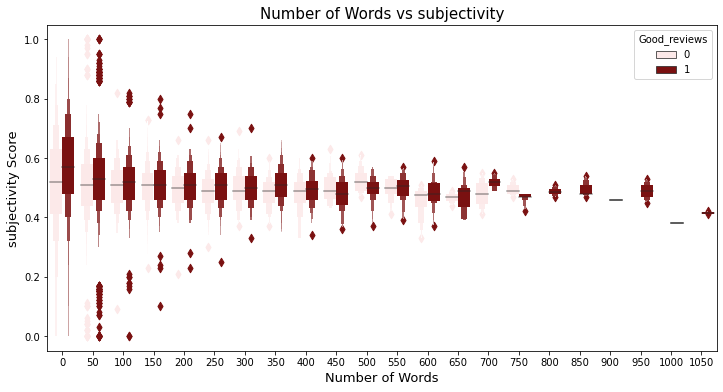

In [0]:
plt.figure(figsize=(12,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='word_count', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'darkred')
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('Number of Words vs subjectivity', fontsize=15)
plt.show();

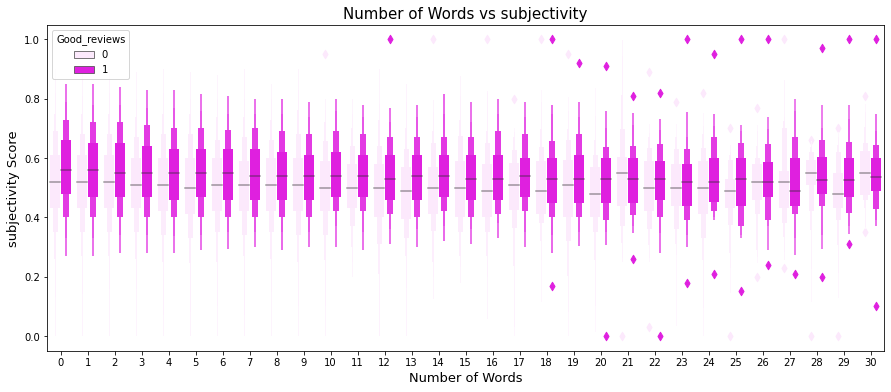

In [0]:
plt.figure(figsize=(15,6))
df_sub= df.loc[df.HelpfulnessNumerator <=30]
sns.boxenplot(x='HelpfulnessNumerator', y='subjectivity', hue='Good_reviews', data=df_sub, color= 'magenta')
plt.xlabel('HelpfulnessNumerator', fontsize=13)
plt.ylabel('subjectivity Score', fontsize=13)
plt.title('HelpfulnessNumerator vs subjectivity', fontsize=15)
plt.show();

In [0]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'stopwords',
 'punctuation',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word',
 'Good_reviews',
 'polarity',
 'subjectivity']

In [0]:
# Top 10 reviews that have highest polarity (most positive sentiment) but 'good review' value is 0, and most subjective (opinion):
df.loc[(df["Good_reviews"] == 0) & (df.polarity == 1 ) & (df.subjectivity ==1), "Text"].head(10).tolist()


['expecting terms companys reputation excellent home delivery products',
 'used icicle two hours taking break plug laptop wont recognize everything could think fix even hours searching google nothing process return wouldve perfect worked',
 'description tea lists organic ingredients tea received one ingredients organicbr say amazon awesome responding refunding think tea listed organic',
 'damaged cans well eight cans dented box perfectly packaged undamamaged',
 'havent quite determined yogi detox cause since drinking three days lots dizziness going drink week see relationship symptom lots ingredients tastes wonderful may interacting medication',
 'flavors tried excellent one isnt wouldnt suggest',
 'bought oatmeal target trying save money starbucks oatmeal price perfect diet trying cut sugar oatmeal would perfect separated fruit nuts sugar cinammon add depending people preference',
 'like itbut impressive waywill stick grain bread use company',
 'sardines excellent cautionthese packed 

Sarcasm is a reason for high polarity score

In [0]:
# 5 sample reviews that have highest polarity (most positive sentiment) and 'good review' value is 1, and most subjective (opinion):
df.loc[(df["Good_reviews"] == 1) & (df.polarity == 1 ) & (df.subjectivity ==1), "Text"].sample(5).tolist()

['would thought would order candy mail product arrived heat september damage ordered candy favors wedding perfect',
 'grateful find espresso capsules amazon used lost supplier wont go anywhere else excellent stuff',
 'absolutely wonderful tasty filling two points ww plan flavors three staple house',
 'wife tea drinker says tea flavorful blend vanilla spice tastes smells wonderful',
 'product excellent baking size convenient well use oatmeal cookies trail mix etc etc']

In [0]:
# Top 10 reviews that have lowest polarity (most negative sentiment) but 'good review' value is 1, and most subjective (opinion):
df.loc[(df["Good_reviews"] == 1) & (df.polarity == -1 ) & (df.subjectivity ==1), "Text"].head(10).tolist()

['discovered sensitivity gluten months ago dismayed horrible glutenfree foods market since found substitute foods acceptable bisquick glutenfree pancake baking mix one use every sunday make either pancakes waffles recommend mix wholeheartedly',
 'china thing scared minute tastybr one word caution lot product per circumstances freeze leftover productbr rice takes terrible texture inedible',
 'cat review discovered product migraines thirty years pain mausea terrible cola helped nausea never treated migraine anything sn orphan disease',
 'brotherinlaw got hooked bariani olive oil terrificbr use almost every day like storebought brands almost gooey awful tastingbr recommend everyone well everyone wouldnt',
 'use give dogs nasty tasting pills works like charm',
 'son loves like cheese pufftype thing leave crumbs everywhere brother banned daughter resulting poop quite terrible',
 'forget highpriced energy tsps anything give energy youve ever imaginedbr shocking',
 'helps recovery time runnin

As we can see, some of these tweets are about dealing with bad things with the items. But, their polarity scores are -1 because of the job of the item.


#####Let's save this data 

In [0]:
df.to_csv('Amazon_reviews_after_sentiment.csv', index=False)